In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize (creds)
worksheet = gc.open('Exp-1 DL').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'x': 'float'})
dataset1 = dataset1.astype({'y': 'float'})
dataset1.head()

,x,y
0,1.0,11.0
1,2.0,12.0
2,3.0,13.0
3,4.0,14.0
4,5.0,15.0


In [ ]:
X = dataset1[['x']].values
y = dataset1[['y']].values
#X
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)
ai_brain = Sequential ([
Dense (8, activation = 'relu'),
Dense (10, activation = 'relu'),
Dense (1)
])
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(X_train1, y_train, epochs =2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step - loss: 208.2460
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 207.6641
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 207.2288
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 206.8653
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 206.5423
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 206.2458
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 205.9678
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 205.7037
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 205.4502
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 205.2051
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 204.9668
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 204.7339
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 204.5056
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 204.2814
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

<Axes: >

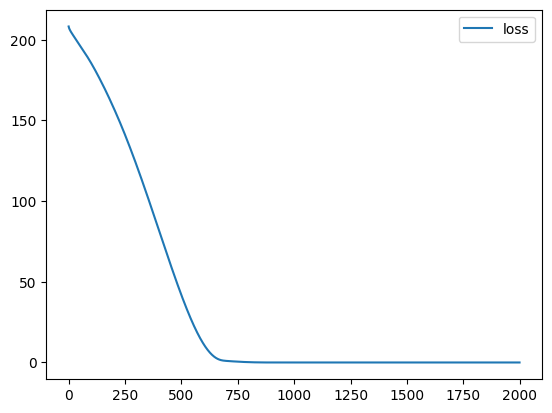

In [26]:
loss_df= pd.DataFrame(ai_brain.history.history)
loss_df.plot()


In [27]:
X_test1=Scaler.transform(X_test)
ai_brain.evaluate(X_test1, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 9.8798e-04


0.0009879769058898091

In [28]:
X_n1=[[7]]
X_n1_1=Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


array([[16.974619]], dtype=float32)